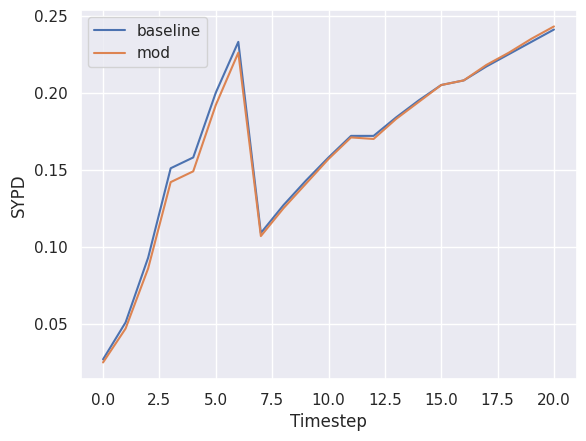

In [1]:
import pandas as pd
import seaborn as sns
import os

sns.set_theme()

log_path_template = "../.calkit/slurm/logs/amip-{case}.out"


def get_sypd_time_series(case) -> list[float]:
    with open(log_path_template.format(case=case)) as f:
        lines = f.readlines()
    sypd_time_series = []
    for line in lines:
        if "estimated_sypd =" in line and "Inf" not in line:
            sypd_time_series.append(float(line.split()[-1].replace('"', "")))
    return sypd_time_series


df = pd.DataFrame(
    {
        "baseline": get_sypd_time_series("baseline"),
        "mod": get_sypd_time_series("mod"),
    }
)
ax = df.plot(ylabel="SYPD", xlabel="Timestep")

os.makedirs("../figures", exist_ok=True)

ax.get_figure().savefig("../figures/sypd-time-series.png")

In [2]:
(df["mod"] / df["baseline"]).mean()

np.float64(0.9775779379753524)